# Name : Atharv Prasad Paranjape

# Task 2 : Prediction using Unsupervised ML

# Problem : From the given ‘Iris’ dataset, predict the optimum number of                                 clusters and represent it visually.


In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets


In [2]:
# Load the datset
iris = datasets.load_iris()
data = pd.DataFrame(iris.data , columns = iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Now time to find the optimum value of 'k' ie.No. of clusters 
There are two methods to find the optimum value of k , namely "Elbow Method" and "Silhouette Method".

Here , I will be using Elbow method.

In [3]:
x = data.iloc[: , [0,1,2,3]].values

from sklearn.cluster import KMeans
sum_squares = []

for i in range(1 ,11):
    kmeans = KMeans(n_clusters = i , init = 'k-means++' , max_iter = 300 , n_init = 10 , random_state = 0)
    kmeans.fit(x)
    sum_squares.append(kmeans.inertia_)

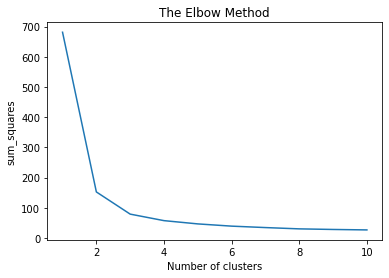

In [4]:
# Plotting a line graph and spotting the 'Elbow'
plt.plot(range(1 , 11) , sum_squares)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('sum_squares')
plt.show()

From the above graph we can see a point (Elbow) from where the optimum value of sum_squares does not decrease significantly with every iteration.

Hence we choose K as 3

In [5]:
# Applyting the K-Means 
kmeans = KMeans(n_clusters = 3 , init = 'k-means++' , max_iter = 300 , n_init = 10 , random_state = 0)
y_kmeans = kmeans.fit_predict(x)

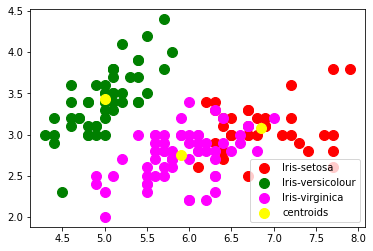

In [6]:
# Visualizing the clusters
plt.scatter(x[y_kmeans == 0 , 0] , x[y_kmeans == 0 , 1] , s=100 , c='red' , label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1 , 0] , x[y_kmeans == 1 , 1] , s=100 , c='green' , label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2 , 0] , x[y_kmeans == 2 , 1] , s=100 , c='magenta' , label = 'Iris-virginica')

#Plotiing cetroids of the cluster
plt.scatter(kmeans.cluster_centers_[: , 0] , kmeans.cluster_centers_[: , 1] , s=100 , c='yellow' , label = 'centroids')
plt.legend()